## Exploratory Data Analysis

#### Hypotheses:
- I expect churn to be primarily affected by:
  - **Cost:** Higher cost customers will be more likely to leave.
  - **Contract:** Customers are less likely to leave if they have a 1 or 2 year contract.
  - **Alternatives:** Internet customers without alternatives will be less likely to leave.  
    - NOTE: This dataset does not have the information to test this hypothesis, however the availability of alternatives is an important unknown to keep in mind.


#### Notes to self:
- **Visualize:** use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

- **Test your hypotheses when visualization isn't immediately clear.** Use the appropriate statistical tests (t-tests, correlation, chi-square)

In [1]:
#backbone libraries
import numpy as np
import pandas as pd
#extra math
import math
from scipy import stats
#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Project Data support
import wrangle


In [2]:
#Get the data
df = wrangle.getData('telco')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [3]:
#I want 70/15/15 split
tr, te, val = wrangle.prep_telco(df,val_ratio=.15,test_ratio=.15)

In [4]:
tr.shape

(4922, 47)

In [5]:
te.shape

(1055, 47)

In [6]:
val.shape

(1055, 47)

### Univariate Stats - See wrangle notes

### Bivariate Stats. Bivariate means two variables.
- Plot the interactions of each variable with the target. Document your takeaways.
- For numeric to numeric, use a scatterplot or lineplot
- For numeric to categorical variables, see https://seaborn.pydata.org/tutorial/categorical.html
- Explore interation of independent variables using viz and/or hypothesis testing to address interdependence.


In [9]:
tr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 828 to 4434
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 4922 non-null   object 
 1   senior_citizen                         4922 non-null   int64  
 2   partner                                4922 non-null   object 
 3   dependents                             4922 non-null   object 
 4   tenure                                 4922 non-null   int64  
 5   phone_service                          4922 non-null   object 
 6   multiple_lines                         4922 non-null   object 
 7   online_security                        4922 non-null   object 
 8   online_backup                          4922 non-null   object 
 9   device_protection                      4922 non-null   object 
 10  tech_support                           4922 non-null   object 
 11  st

In [10]:
#subset non-encoded data
tr_eda = tr.iloc[:,:20]
tr_eda.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
828,Male,0,Yes,Yes,68,No,No phone service,Yes,Yes,Yes,Yes,No,Yes,Yes,56.4,3948.45,No,DSL,Two year,Mailed check
2317,Female,1,No,No,5,No,No phone service,No,No,No,No,Yes,Yes,No,45.7,198.00,Yes,DSL,Month-to-month,Electronic check


In [13]:
tr_eda_cat = tr_eda.drop(columns=['tenure','monthly_charges','total_charges'])
tr_eda_cat.shape

(4922, 17)

<AxesSubplot:xlabel='online_backup', ylabel='Count'>

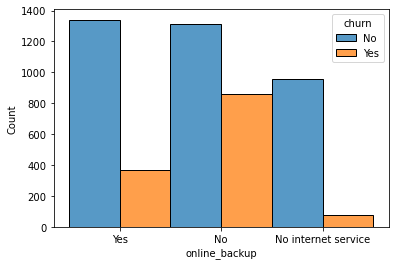

In [44]:
sns.histplot(data=tr_eda_cat,x='online_backup',hue='churn',multiple='dodge')

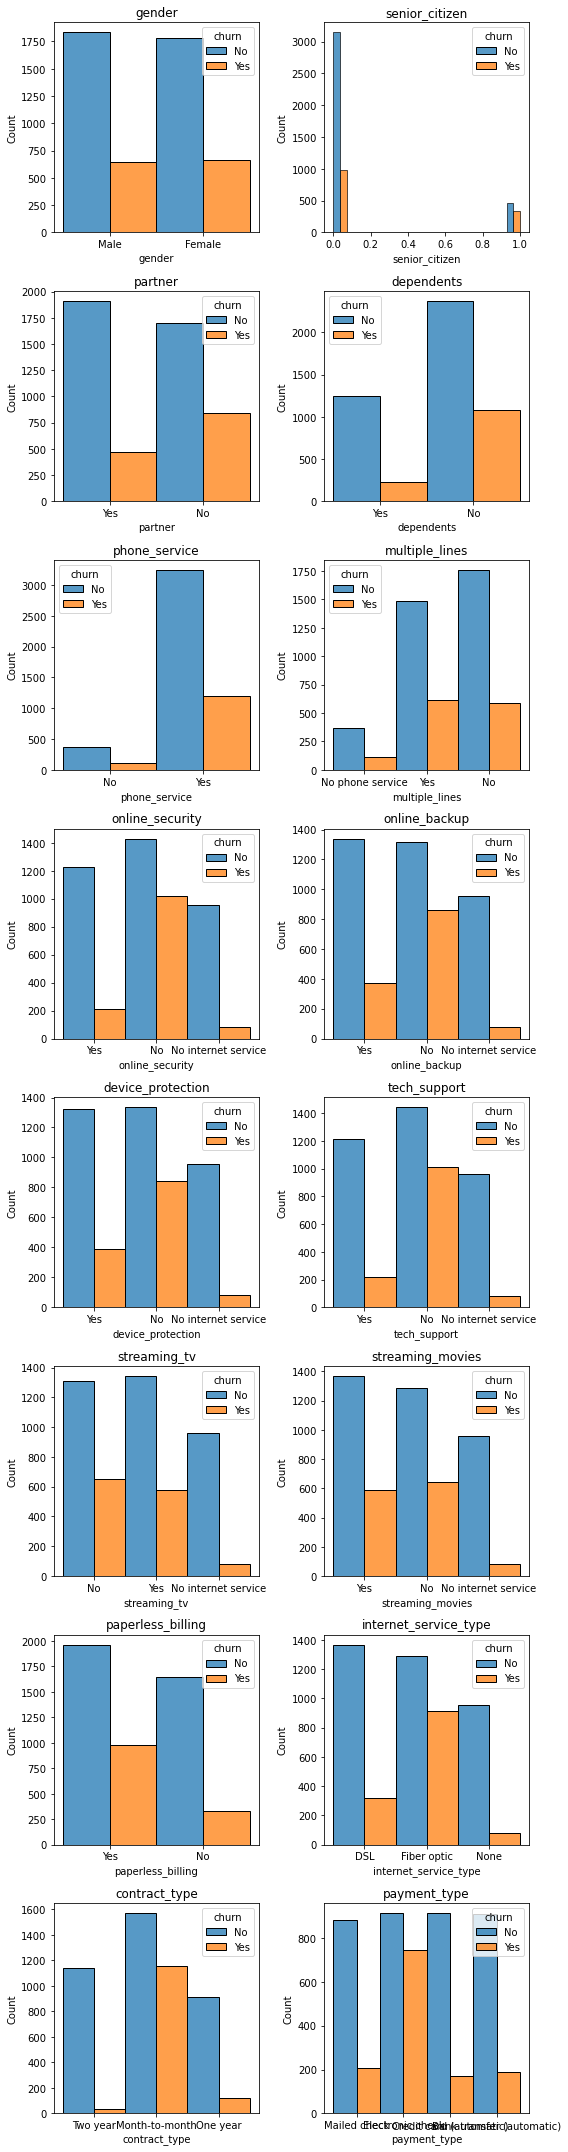

In [45]:
plt.figure(figsize=(8,30))
ct = 0
for i in tr_eda_cat.columns:
    if i == 'churn': continue
    else:
        ct += 1
        plt.subplot(8,2,ct)
        sns.histplot(data=tr_eda_cat,x=i,hue='churn',multiple='dodge')
        plt.title(i)
    
plt.tight_layout()

### Multivariate Stats (more than 2 variables): 
Ask additional questions of the data, such as how subgroups compare to each-other and to the overall population. Answer questions using visualizations and/or hypothesis testing.
- If you're using seaborn's relplot or catplot, use the hue or col arguments to add extra dimension(s) to the visuals.
- Using sns.pairplot with hue may be helpful. With too many columns, however, it can produce visuals that are too noisy to be useful.
- See https://seaborn.pydata.org/tutorial/axis_grids.html for more multivariate options